In [ ]:
#This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
# to predict the closing price of a corporation using the past 60 day stock price

In [ ]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
#Get the stock quote
df=web.DataReader('TSLA', data_source='yahoo', start='2012-01-01', end='2022-11-3')
#Showing the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,1.966667,1.843333,1.929333,1.872000,13921500.0,1.872000
2012-01-04,1.911333,1.833333,1.880667,1.847333,9451500.0,1.847333
2012-01-05,1.862000,1.790000,1.850667,1.808000,15082500.0,1.808000
2012-01-06,1.852667,1.760667,1.813333,1.794000,14794500.0,1.794000
2012-01-09,1.832667,1.741333,1.800000,1.816667,13455000.0,1.816667
...,...,...,...,...,...,...
2022-10-28,228.860001,216.350006,225.399994,228.520004,69152400.0,228.520004
2022-10-31,229.850006,221.940002,226.190002,227.539993,61554300.0,227.539993
2022-11-01,237.399994,227.279999,234.050003,227.820007,62688800.0,227.820007


In [ ]:
#Get the number of row and columns in the data set
df.shape

(2729, 6)

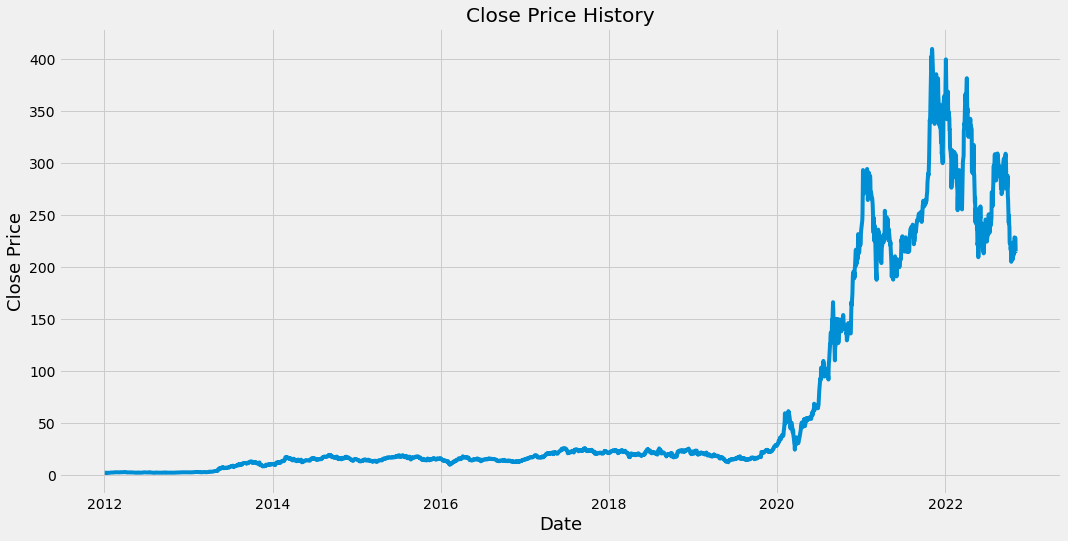

In [ ]:
#Visualize the closing price History
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()


In [ ]:
#Create a new dataframe with only the Close column
data=df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the LSTM model
training_data_len = math.ceil(len(dataset)* .8)


training_data_len

2184

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00086343],
       [0.00080303],
       [0.00070674],
       ...,
       [0.55404653],
       [0.52261063],
       [0.52341857]])

In [ ]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Spilt the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=63:
    print(x_train)
    print(y_train)
    print()

[array([0.00086343, 0.00080303, 0.00070674, 0.00067246, 0.00072796,
       0.00078834, 0.00088791, 0.00089117, 0.        , 0.00062186,
       0.00065614, 0.00064798, 0.00062186, 0.00064961, 0.0007557 ,
       0.00084547, 0.00100379, 0.00106745, 0.00110662, 0.00102501,
       0.00110825, 0.00121761, 0.00136451, 0.0014706 , 0.00143796,
       0.00149182, 0.00159791, 0.00135634, 0.00142   , 0.00169421,
       0.00176439, 0.00185906, 0.001988  , 0.00191129, 0.00186559,
       0.00191618, 0.00178887, 0.00176766, 0.00179867, 0.00173338,
       0.0018966 , 0.00183621, 0.00179214, 0.00168441, 0.00168605,
       0.00167789, 0.00195046, 0.00215775, 0.00217081, 0.00204023,
       0.0019929 , 0.00204513, 0.00198963, 0.00198637, 0.00201738,
       0.00189497, 0.00184274, 0.00238462, 0.00247276, 0.00245807])]
[0.0023731972591546557]

[array([0.00086343, 0.00080303, 0.00070674, 0.00067246, 0.00072796,
       0.00078834, 0.00088791, 0.00089117, 0.        , 0.00062186,
       0.00065614, 0.00064798, 0.

In [ ]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1] ,1))
x_train.shape

(2124, 60, 1)

In [ ]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile the model
model.compile(optimizer="adam", loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2124/2124 [==============================] - 67s 30ms/step - loss: 1.8355e-04


In [ ]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60:, :]
#Create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

18/18 [==============================] - 1s 16ms/step


In [ ]:
#Get the root mean squared error (RMSE)
#0 means very accurate
rmse=np.sqrt(np.mean( predictions - y_test)**2)
rmse

18.839593939824937

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


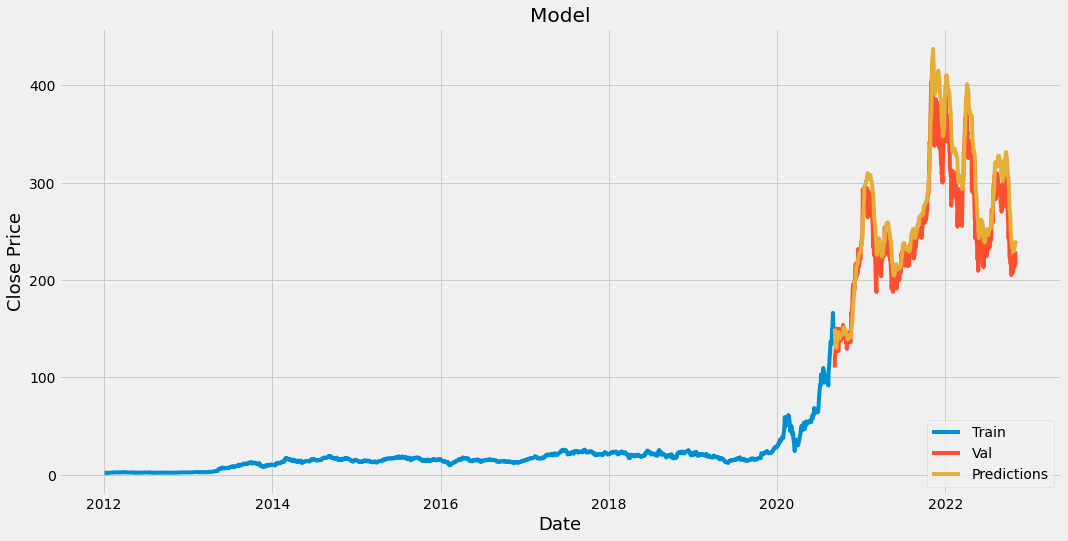

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [ ]:
#Show the valid and predicted prices
valid


,Close,Predictions
Date,,
2020-09-08,110.070000,149.968658
2020-09-09,122.093330,143.401794
2020-09-10,123.779999,137.667435
2020-09-11,124.239998,133.314529
2020-09-14,139.873337,130.278564
...,...,...
2022-10-28,228.520004,233.065155
2022-10-31,227.539993,235.344482
2022-11-01,227.820007,237.294067


In [ ]:
#Get the quote
apple_quote=web.DataReader('TSLA', data_source='yahoo', start='2012-01-01', end='2022-11-04')

#Create a new dataframe
new_df = apple_quote.filter(['Close'])

#Get the last 60 day closing price values and convert the dataframe to array
last_60_days = new_df[-60:].values

#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

#Create an empty list
X_test=[]

#Append the past 60 days
X_test.append(last_60_days_scaled)

#Convert the X_test data set to a numpy array
X_test=np.array(X_test)

#Reshape the data
X_test=np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Get the predicted scale price
pred_price = model.predict(X_test)

#Undo the Scaling
pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

1/1 [==============================] - 0s 26ms/step
[[232.92032]]


In [ ]:
#Get the quote
apple_quote2=web.DataReader('TSLA', data_source='yahoo', start='2022-11-5', end='2022-11-5')
print(apple_quote2['Close'])

Date
2022-11-04    207.470001
Name: Close, dtype: float64
